# Problemas de prueba de hipótesis

## Ejercicio 1

Usted es un nutricionista que investiga dos tipos diferentes de dietas para ver si existe una diferencia significativa en la pérdida de peso después de un mes. Eliges dos grupos aleatorios de personas; un grupo sigue la primera dieta y el otro sigue la segunda. Al final del mes, se registra la pérdida de peso (en kg) de cada persona:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

Con estos datos se busca responder a la siguiente pregunta: ¿Existe una diferencia significativa en la pérdida de peso promedio entre las personas que siguieron la primera dieta y las que siguieron la segunda dieta?

Para sacar conclusiones, siga los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba para comprobar la hipótesis. Puede utilizar la prueba t de Student.
-Analizar las conclusiones.

In [1]:
import numpy as np
from scipy.stats import ttest_ind

# Datos
diet1 = np.array([2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5])
diet2 = np.array([3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2])

# Prueba t de Student para muestras independientes
t_stat, p_value = ttest_ind(diet1, diet2, equal_var=True)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Nivel de significancia
alpha = 0.05

if p_value < alpha:
    print("❌ Rechazamos H0: existe diferencia significativa entre las dos dietas.")
else:
    print("✅ No se rechaza H0: no hay diferencia significativa entre las dos dietas.")


T-statistic: -3.5383
P-value: 0.0041
❌ Rechazamos H0: existe diferencia significativa entre las dos dietas.


## ANOVA

**ANOVA** (*Analysis of Variance - Análisis de variación*) Es una técnica estadística utilizada para comparar las medidas de dos o más grupos. La idea detrás de ANOVA es descomponer la variabilidad total de los datos en dos componentes: variabilidad entre grupos y variabilidad dentro de los grupos:

- **Variabilidad entre grupos**: Esta variabilidad se refiere a las diferencias entre las medias del grupo. Si esta variabilidad es considerablemente mayor que la variabilidad dentro del grupo, podría ser una indicación de que al menos una de las medias del grupo es diferente.
- **Variabilidad dentro del grupo**: Esta variabilidad se refiere a la dispersión de los datos dentro de cada grupo. Si todos los grupos tienen una variabilidad similar, entonces cualquier diferencia notable en las medias de los grupos podría considerarse significativa.

Las hipótesis en ANOVA suelen incluir:

- **Hipótesis nula** ($H₀$): Las medias de todos los grupos son iguales.
- **Hipótesis alternativa** ($H₁$): Al menos una de las medias del grupo es diferente.

Si el resultado de la prueba ANOVA es significativo (por ejemplo, un valor p inferior a un umbral como 0,05), esto sugiere que al menos la media de un grupo es diferente.

## Ejercicio 2

Un agricultor decide probar tres tipos diferentes de fertilizantes para determinar si alguno es superior en términos de producción de maíz. El agricultor planta maíz en 15 parcelas idénticas y utiliza los tres fertilizantes (5 parcelas para cada tipo). Al final de la temporada mide el rendimiento de maíz (en kg) de cada parcela, con el siguiente resultado:

| Fertilizante 1 | Fertilizante 2 | Fertilizante 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

Con estos datos busca responder la siguiente pregunta: ¿Existe una diferencia significativa en el rendimiento promedio del maíz entre los tres tipos de fertilizantes?

Para ayudarte, sigue los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba ANOVA.
-Analizar las conclusiones.
-Si un fertilizante es mejor que otro, ¿cómo podemos saberlo?

1) Datos y descriptivos

In [2]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd

F1 = np.array([20, 21, 20, 19, 20])
F2 = np.array([22, 21, 23, 22, 21])
F3 = np.array([24, 23, 22, 23, 24])

df = pd.DataFrame({
    "rendimiento": np.r_[F1, F2, F3],
    "fertilizante": (["F1"]*len(F1)) + (["F2"]*len(F2)) + (["F3"]*len(F3))
})

# Medias por grupo
df.groupby("fertilizante")["rendimiento"].agg(["count","mean","std"]).round(3)


,count,mean,std
fertilizante,,,
F1,5,20.0,0.707
F2,5,21.8,0.837
F3,5,23.2,0.837


2) ANOVA de un factor (one-way)

In [4]:
from scipy.stats import f_oneway

F_stat, p_value = f_oneway(F1, F2, F3)
print(f"F = {F_stat:.4f}  |  p-value = {p_value:.6f}")

alpha = 0.05
if p_value < alpha:
    print("❌ Rechazamos H0: hay diferencias entre al menos dos fertilizantes.")
else:
    print("✅ No se rechaza H0: no hay evidencia de diferencias entre medias.")


F = 20.3158  |  p-value = 0.000140
❌ Rechazamos H0: hay diferencias entre al menos dos fertilizantes.


3) Efecto (η²) — qué tan grande es la diferencia

In [5]:
# Eta cuadrado (eta^2) para ANOVA de un factor
grand_mean = df["rendimiento"].mean()

# Suma de cuadrados entre grupos (SS_between)
ss_between = sum(len(g)* (g.mean()-grand_mean)**2 for _, g in df.groupby("fertilizante")["rendimiento"])
# Suma de cuadrados total (SS_total)
ss_total = ((df["rendimiento"] - grand_mean)**2).sum()

eta_sq = ss_between / ss_total
print(f"Eta^2 = {eta_sq:.3f}  (0.01 pequeño, 0.06 medio, 0.14 grande)")


Eta^2 = 0.772  (0.01 pequeño, 0.06 medio, 0.14 grande)


4) Comparaciones múltiples (post-hoc Tukey) — ¿cuál es mejor?

In [6]:
# Puede que necesites statsmodels. Si no está, instala: pip install statsmodels
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=df["rendimiento"],
    groups=df["fertilizante"],
    alpha=0.05
)
print(tukey)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
    F1     F2      1.8 0.0099 0.4572 3.1428   True
    F1     F3      3.2 0.0001 1.8572 4.5428   True
    F2     F3      1.4 0.0409 0.0572 2.7428   True
--------------------------------------------------


5) (Opcional) Comprobaciones de supuestos

In [7]:
from scipy.stats import shapiro, levene

# Normalidad (Shapiro) en cada grupo
for etiqueta, g in df.groupby("fertilizante")["rendimiento"]:
    stat, p = shapiro(g)
    print(f"Shapiro {etiqueta}: p={p:.3f}")

# Homogeneidad de varianzas (Levene)
statL, pL = levene(F1, F2, F3, center='mean')
print(f"Levene: p={pL:.3f}  → p>0.05 sugiere varianzas similares")


Shapiro F1: p=0.325
Shapiro F2: p=0.314
Shapiro F3: p=0.314
Levene: p=0.663  → p>0.05 sugiere varianzas similares


6) Visualizaciones rápidas (opcional)

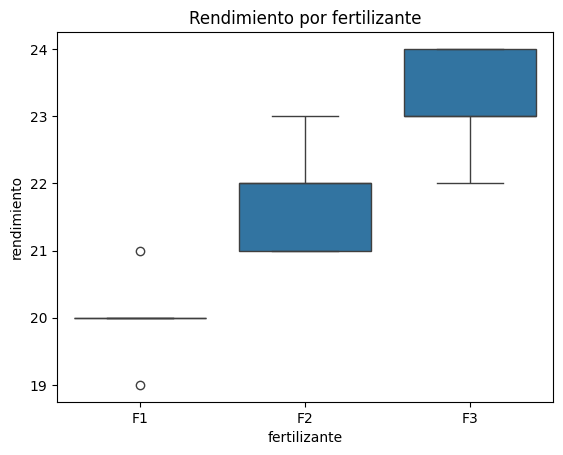

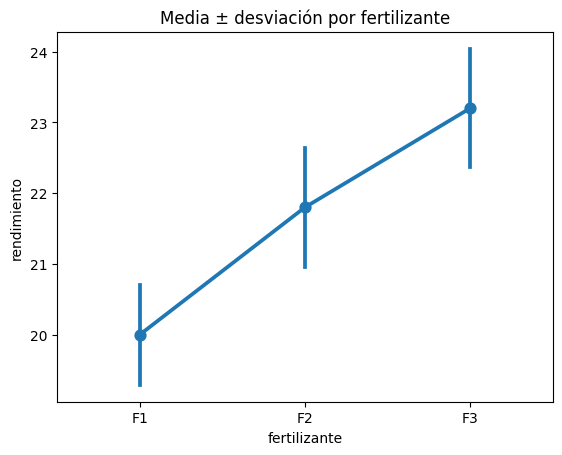

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=df, x="fertilizante", y="rendimiento")
plt.title("Rendimiento por fertilizante")
plt.show()

sns.pointplot(data=df, x="fertilizante", y="rendimiento", errorbar="sd")
plt.title("Media ± desviación por fertilizante")
plt.show()

